        Name: Ashwini Giri          USC ID: 5413882039                 Team: Vectors

# Training 3 K-means models

Importing all the packages needed for the project. I have used scikit learn, pickle, pandas, numpy, seaborn, scipy, matplotlib and warnings libarier to build this entire model.

In [686]:
import pandas as pd
import numpy as np
from matplotlib import cm
from scipy.stats import kde
import seaborn as sns
import matplotlib.dates as md
from matplotlib import pyplot as plt
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import calinski_harabaz_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

Importing all the datasets.
The data is seperated based on different levels in the gallery.
Size of data:
Train sample = 100000 rows
Test sample = 1000 rows

In [3]:
level_1_train = pd.read_csv('level_1_train.csv')
level_1_test = pd.read_csv('level_1_test.csv')
level_5_train = pd.read_csv('level_5_train.csv')
level_5_test = pd.read_csv('level_5_test.csv')
level_B1_train = pd.read_csv('level_B1_train.csv')
level_B1_test = pd.read_csv('level_B1_test.csv')
mon = pd.read_csv('mon.csv')
tue = pd.read_csv('tue.csv')
wed = pd.read_csv('wed.csv')
thr = pd.read_csv('thr.csv')
fri = pd.read_csv('fri.csv')
sat = pd.read_csv('sat.csv')
sun = pd.read_csv('sun.csv')

Checking the data and dropping non-required columns

In [4]:
level_1_train.drop(['Unnamed: 0','ClientMacAddr','timestamp','month','day','DayOfTheWeek'],inplace=True,axis=1)
level_B1_train.drop(['Unnamed: 0','ClientMacAddr','timestamp','month','day','DayOfTheWeek'],inplace=True,axis=1)
level_5_train.drop(['Unnamed: 0','ClientMacAddr','timestamp','month','day','DayOfTheWeek'],inplace=True,axis=1)
level_1_test.drop(['Unnamed: 0','timestamp','month','day','DayOfTheWeek'],inplace=True,axis=1)
level_5_test.drop(['Unnamed: 0','timestamp','month','day','DayOfTheWeek'],inplace=True,axis=1)
level_B1_test.drop(['Unnamed: 0','timestamp','month','day','DayOfTheWeek'],inplace=True,axis=1)
mon.drop('Unnamed: 0',inplace=True,axis=1)
tue.drop('Unnamed: 0',inplace=True,axis=1)
wed.drop('Unnamed: 0',inplace=True,axis=1)
thr.drop('Unnamed: 0',inplace=True,axis=1)
fri.drop('Unnamed: 0',inplace=True,axis=1)
sat.drop('Unnamed: 0',inplace=True,axis=1)
sun.drop('Unnamed: 0',inplace=True,axis=1)

Visualizations for Weekday wise number of visitors

This visualizations shows the hourly frequency of visitors for Monday.

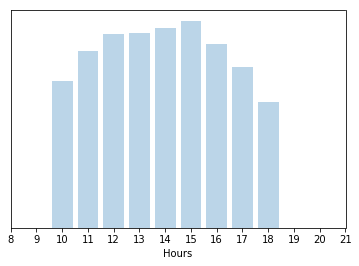

In [36]:
plt.bar(mon['hours'], mon['counts'], align='center', alpha=0.3)
plt.xticks(list(range(8,22)))
plt.xlabel('Hours')
plt.yticks([])
plt.savefig('mon.png', bbox_inches='tight')
plt.show()

This visualizations shows the hourly frequency of visitors for Tuesday.

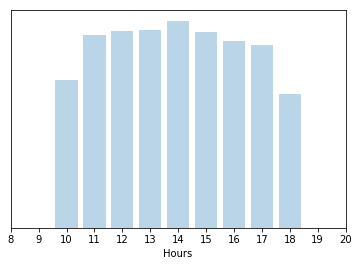

In [41]:
plt.bar(tue['hours'], tue['counts'], align='center', alpha=0.3)
plt.xticks(list(range(8,21)))
plt.xlabel('Hours')
plt.yticks([])
plt.savefig('tue.png', bbox_inches='tight')
plt.show()

This visualizations shows the hourly frequency of visitors for Wednesday.

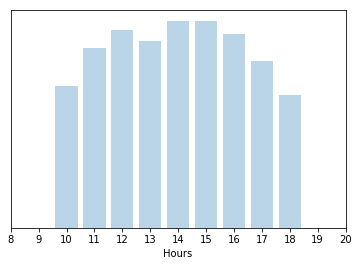

In [42]:
plt.bar(wed['hours'], wed['counts'], align='center', alpha=0.3)
plt.xticks(list(range(8,21)))
plt.xlabel('Hours')
plt.yticks([])
plt.savefig('wed.png', bbox_inches='tight')
plt.show()

This visualizations shows the hourly frequency of visitors for Thursday.

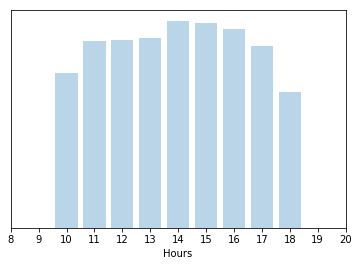

In [43]:
plt.bar(thr['hours'], thr['counts'], align='center', alpha=0.3)
plt.xticks(list(range(8,21)))
plt.xlabel('Hours')
plt.yticks([])
plt.savefig('thr.png', bbox_inches='tight')
plt.show()

This visualizations shows the hourly frequency of visitors for Friday.

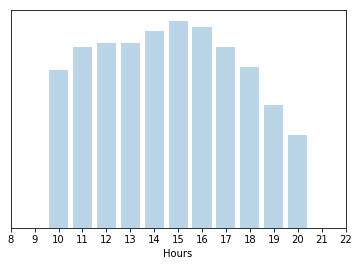

In [44]:
plt.bar(fri['hours'], fri['counts'], align='center', alpha=0.3)
plt.xticks(list(range(8,23)))
plt.xlabel('Hours')
plt.yticks([])
plt.savefig('fri.png', bbox_inches='tight')
plt.show()

This visualizations shows the hourly frequency of visitors for Saturday.

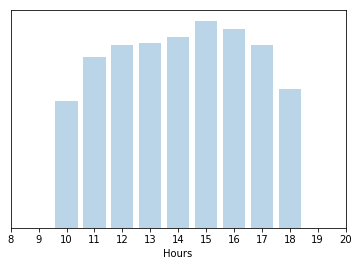

In [45]:
plt.bar(sat['hours'], sat['counts'], align='center', alpha=0.3)
plt.xticks(list(range(8,21)))
plt.xlabel('Hours')
plt.yticks([])
plt.savefig('sat.png', bbox_inches='tight')
plt.show()

This visualizations shows the hourly frequency of visitors for Sunday.

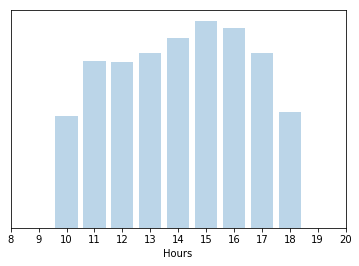

In [46]:
plt.bar(sun['hours'], sun['counts'], align='center', alpha=0.3)
plt.xticks(list(range(8,21)))
plt.xlabel('Hours')
plt.yticks([])
plt.savefig('sun.png', bbox_inches='tight')
plt.show()

Data Preparation for K-Means

In the below code I am normalizing the data before fitting the model using min max scalar.

In [6]:
scaler = MinMaxScaler()
level_1_train_sa = pd.DataFrame(scaler.fit_transform(level_1_train),columns=['lat','lng','hours'])
level_5_train_sa = pd.DataFrame(scaler.fit_transform(level_5_train),columns=['lat','lng','hours'])
level_B1_train_sa = pd.DataFrame(scaler.fit_transform(level_B1_train),columns=['lat','lng','hours'])

In [436]:
l1_t = pd.DataFrame(scaler.fit_transform(level_1_train),columns=['lat','lng','hours'])
l5_t = pd.DataFrame(scaler.fit_transform(level_5_train),columns=['lat','lng','hours'])
B1_t = pd.DataFrame(scaler.fit_transform(level_B1_train),columns=['lat','lng','hours'])

## Sampling the data

In the below code I am taking a sample of data for training

In [7]:
level_1_train_s = level_1_train_sa.sample(n=5000,random_state=1)

In [8]:
level_5_train_s = level_5_train_sa.sample(n=10000,random_state=1)

In [9]:
level_B1_train_s = level_B1_train_sa.sample(n=1000,random_state=1)

## Visualizations for level B1

In [466]:
outliers_B1 = pd.DataFrame({'lat':[0.989915,0.985462,0.489965],'lng':[0.653912,0.706635,0.693454],'hours':[0.2,0.2,0.6]})

In [464]:
B1_t.drop(axis=0,index=[87264,18232,23149],inplace=True)

In [467]:
outliers_B1

,hours,lat,lng
0,0.2,0.989915,0.653912
1,0.2,0.985462,0.706635
2,0.6,0.489965,0.693454


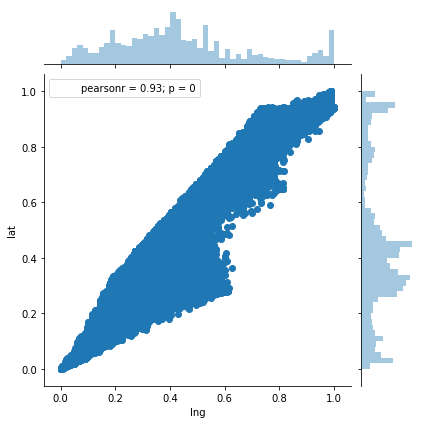

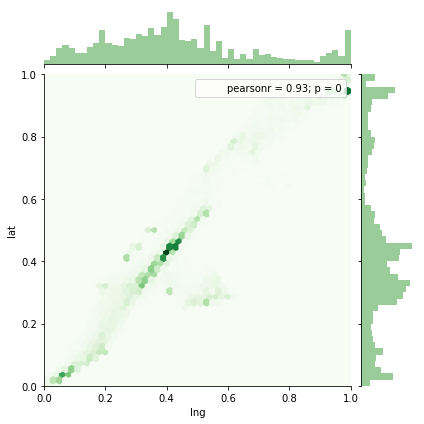

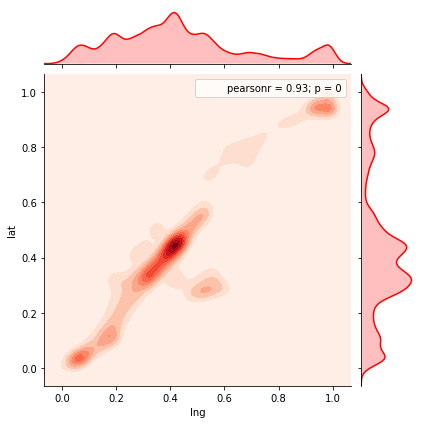

In [465]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
g = sns.jointplot(x=B1_t["lng"], y=B1_t["lat"], kind='scatter')
sns.jointplot(x=B1_t["lng"], y=B1_t["lat"], kind='hex',cmap='Greens',color='Green')
sns.jointplot(x=B1_t["lng"], y=B1_t["lat"], kind='kde',cmap="Reds",color='Red')

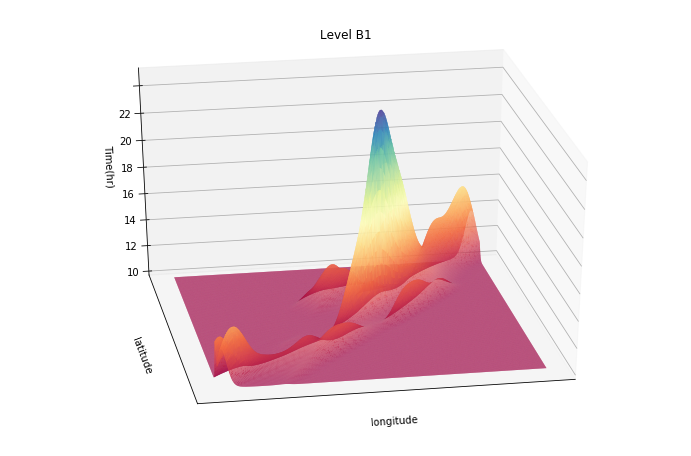

In [468]:
k = kde.gaussian_kde([B1_t.lng,B1_t.lat])
xi, yi= np.mgrid[B1_t.lng.min():B1_t.lng.max():nbins*1j, B1_t.lat.min():B1_t.lat.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Transform it in a dataframe
data=pd.DataFrame({'x': xi.flatten(), 'y': yi.flatten(), 'z': zi})
 
# Make the plot
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_trisurf(data.x, data.y, data.z, cmap=plt.cm.Spectral, linewidth=0.2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticklabels(list(range(10,24,2)))
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('Time(hr)')
ax.set_title('Level B1')
# Adapt angle, first number is up/down, second number is right/left
ax.view_init(30, 80)

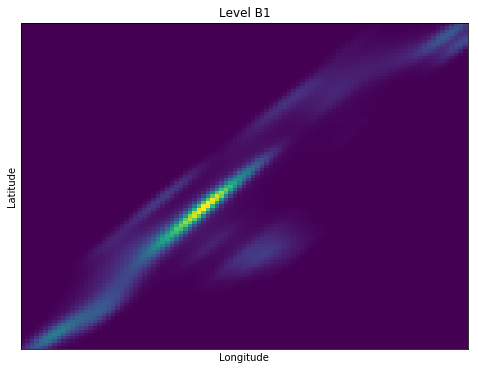

In [478]:
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=100
k = kde.gaussian_kde([B1_t.lng,B1_t.lat])
xi, yi = np.mgrid[B1_t.lng.min():B1_t.lng.max():nbins*1j, B1_t.lat.min():B1_t.lat.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.figure(figsize=(8,6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.xticks([])
plt.yticks([])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Level B1')
# plt.colorbar()
plt.show()

## Visualizations for Level 1

In [516]:
outliers_l1 = pd.DataFrame({'lat':[0.611299,0.593632,0.676056],'lng':[0.468632,0.449624,0.500801],'hours':[0.2,0.2,0.4]})

In [517]:
outliers_l1

,hours,lat,lng
0,0.2,0.611299,0.468632
1,0.2,0.593632,0.449624
2,0.4,0.676056,0.500801


In [519]:
l1_t = l1_t.drop(axis=0,index=[3239,92195,62213])

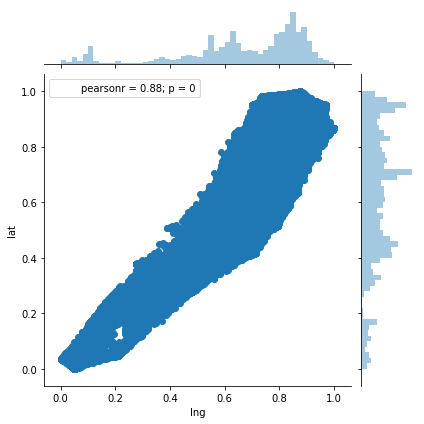

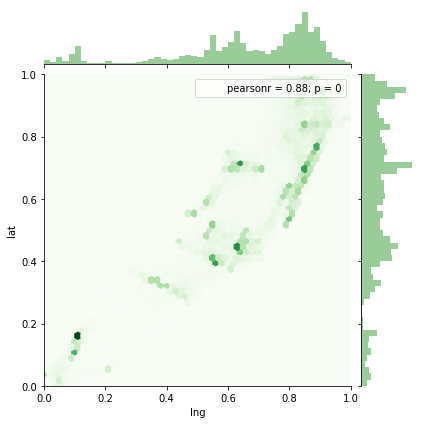

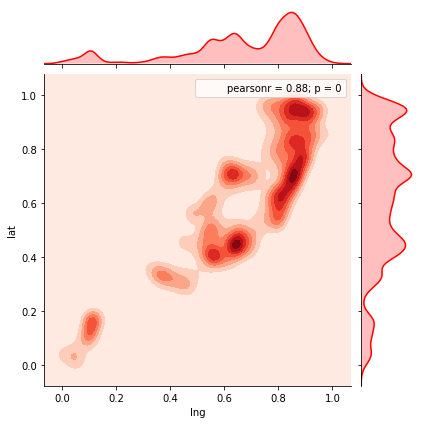

In [520]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=l1_t["lng"], y=l1_t["lat"], kind='scatter')
sns.jointplot(x=l1_t["lng"], y=l1_t["lat"], kind='hex',cmap='Greens',color='Green')
sns.jointplot(x=l1_t["lng"], y=l1_t["lat"], kind='kde',cmap="Reds",color='Red')

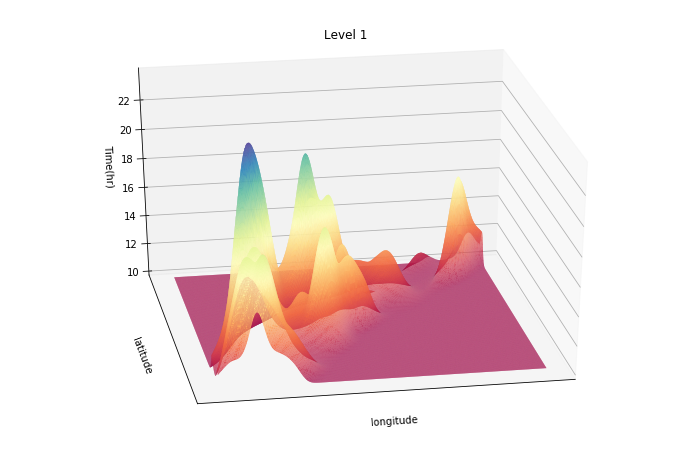

In [477]:
 # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([l1_t.lng,l1_t.lat])
xi, yi= np.mgrid[ l1_t.lng.min():l1_t.lng.max():nbins*1j, l1_t.lat.min():l1_t.lat.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Transform it in a dataframe
data=pd.DataFrame({'x': xi.flatten(), 'y': yi.flatten(), 'z': zi})
 
# Make the plot
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_trisurf(data.x, data.y, data.z, cmap=plt.cm.Spectral, linewidth=0.2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticklabels(list(range(10,24,2)))
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('Time(hr)')
ax.set_title('Level 1')
# Adapt angle, first number is up/down, second number is right/left
ax.view_init(30, 80)


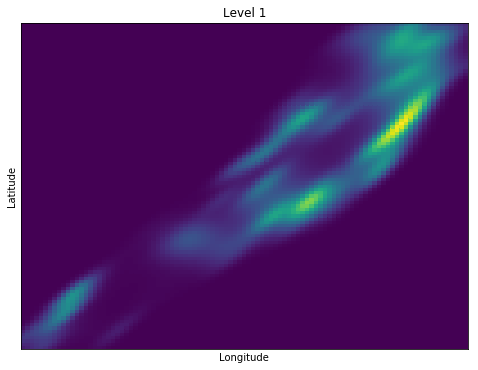

In [480]:
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=100
k = kde.gaussian_kde([l1_t.lng,l1_t.lat])
xi, yi = np.mgrid[l1_t.lng.min():l1_t.lng.max():nbins*1j, l1_t.lat.min():l1_t.lat.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.figure(figsize=(8,6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.xticks([])
plt.yticks([])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Level 1')
# plt.colorbar()
plt.show()


## Visualizations for level 5

In [552]:
outliers_l5 = pd.DataFrame({'lat':[0.191178,0.443682],'lng':[0.442308,1.0],'hours':[0.2,0.5]})

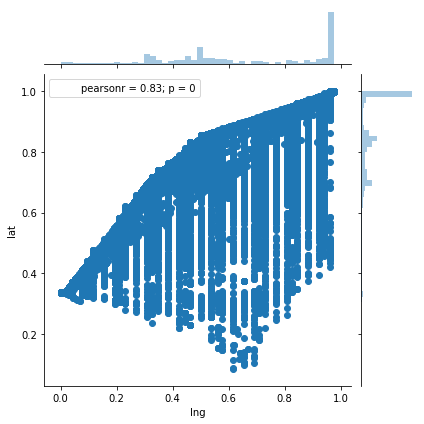

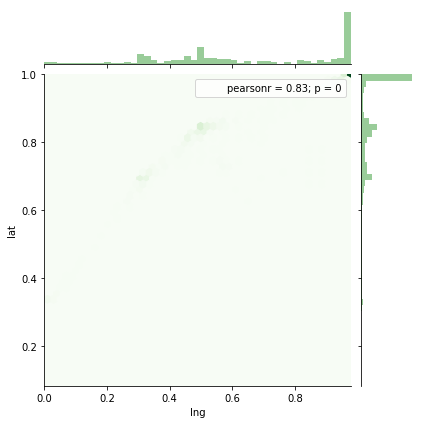

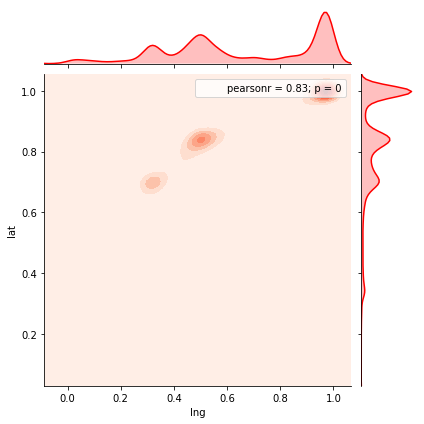

In [551]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=l5_t["lng"], y=l5_t["lat"], kind='scatter')
sns.jointplot(x=l5_t["lng"], y=l5_t["lat"], kind='hex',cmap='Greens',color='Green')
sns.jointplot(x=l5_t["lng"], y=l5_t["lat"], kind='kde',cmap="Reds",color='Red')

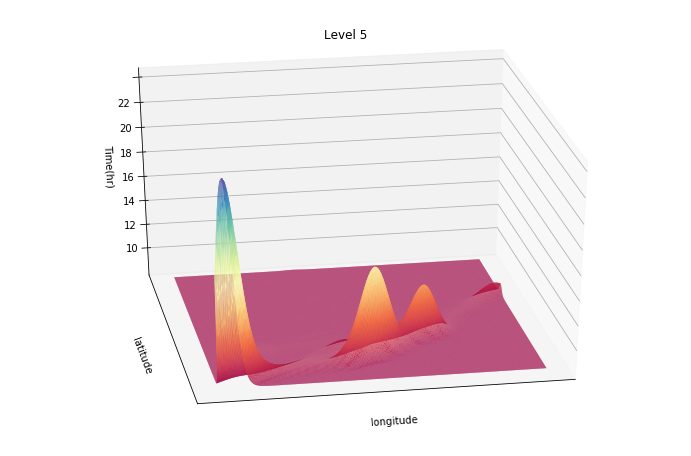

In [473]:
k = kde.gaussian_kde([l5_t.lng,l5_t.lat])
xi, yi= np.mgrid[ l5_t.lng.min():l5_t.lng.max():nbins*1j, l5_t.lat.min():l5_t.lat.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Transform it in a dataframe
data=pd.DataFrame({'x': xi.flatten(), 'y': yi.flatten(), 'z': zi})
 
# Make the plot
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_trisurf(data.x, data.y, data.z, cmap=plt.cm.Spectral, linewidth=0.2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticklabels(list(range(10,24,2)))
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('Time(hr)')
ax.set_title('Level 5')
# Adapt angle, first number is up/down, second number is right/left
ax.view_init(30, 80)


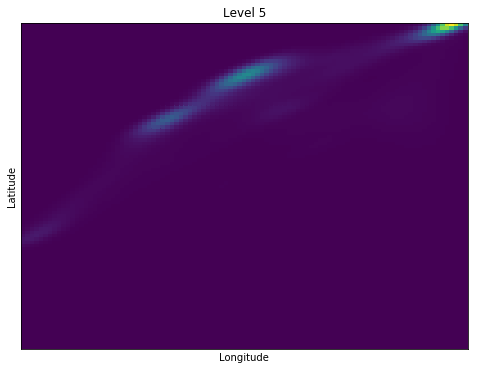

In [479]:
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=100
k = kde.gaussian_kde([l5_t.lng,l5_t.lat])
xi, yi = np.mgrid[l5_t.lng.min():l5_t.lng.max():nbins*1j, l5_t.lat.min():l5_t.lat.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.figure(figsize=(8,6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.xticks([])
plt.yticks([])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Level 5')
# plt.colorbar()
plt.show()

## K-Means on Level B1

The below function returns the distances of points from the corresponding cluster centers. The distance metric used is Euclidien to calculate the distances

In [197]:
# return Series of distance between each point and his distance with the closest centroid
def getDistanceByPoint(data, model):
    alldistances = model.transform(data)
    distances = alldistances.min(axis=1)
    return distances

Finding number of clusters to be formed

In [475]:
B1 = B1_t.drop('hours',axis=1)

Elbow method to determine number of clusters

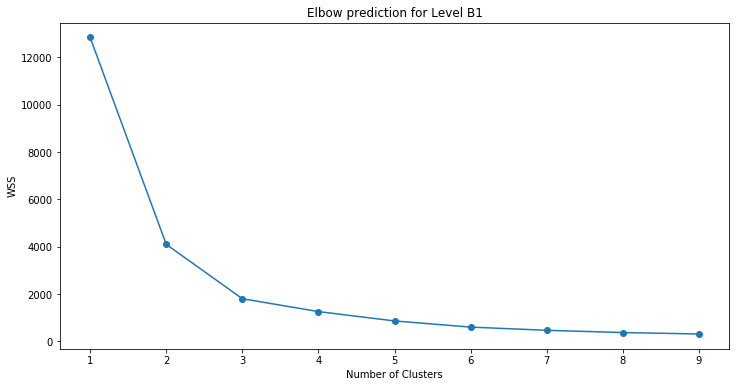

In [476]:
cluster_range = range(1, 10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters)
    clusters.fit(B1)
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow prediction for Level B1')
plt.show()

The elbow is at K=7 hence using K=7

In [599]:
def get_cluster_and_distance(data,model):
    distance = getDistanceByPoint(data,model)
    labels = model.predict(data)
    data['cluster'] = labels
    data['distance'] = distance
    return data

In the below code I am fitting the model with 7 cluster centers and auto algorithm, with Kmean++, i.e. random initialization of cluster centers.

In [600]:
model_B1 = KMeans(n_clusters=7).fit(B1_t[['lat','lng']])
data = get_cluster_and_distance(B1_t[['lat','lng']],model_B1)

In the below code i am creating a dictionary for distance threshold to be used to calculate the anomalies.

In [601]:
centroids_lB1 = {}
distance_threshold_lB1 = dict(data.groupby('cluster')['distance'].max())
for i,val in enumerate(model_B1.cluster_centers_):
    centroids_lB1[i] = list(val)

In [602]:
center = model_B1.cluster_centers_

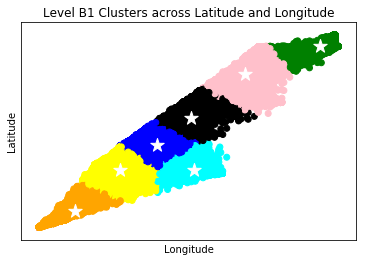

In [603]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'orange', 1:'blue', 2:'green', 3:'yellow', 4:'black',5:'cyan',6:'pink'}
ax.scatter(data['lng'], data['lat'], c=data["cluster"].apply(lambda x: colors[x]))
ax.set_title('Level B1 Clusters across Latitude and Longitude')
ax.set_xlabel('Longitude')
ax.set_xticks([])
ax.set_ylabel('Latitude')
ax.set_yticks([])
plt.scatter(center[:, 1], center[:, 0], c='white', s=200,marker='*');
plt.show()

## Testing Model on validation set for level B1

In [661]:
t = level_B1_test.drop(['ClientMacAddr','hours'],axis=1)
t = pd.DataFrame(scaler.fit_transform(t),columns=['lat','lng'])

In [593]:
outliers_B1 = outliers_B1.drop('hours',axis=1)
outliers_B1['true_label'] = 1

In [624]:
test = B1_t.sample(n=1000,random_state=1)
test.drop('hours',inplace=True,axis=1)
test['true_label'] = 0
test = pd.concat([test,outliers_B1])
test.reset_index(drop=True,inplace=True)
test,y = SMOTE(random_state=42,k_neighbors=1).fit_sample(test[['lat','lng']],test['true_label'])
test = pd.DataFrame({'lat':test[:,0],'lng':test[:,1],'true_label':y})

In [618]:
def get_threshold(df):
    return distance_threshold_lB1[df]

In [669]:
test['distance'] = getDistanceByPoint(test[['lat','lng']],model_B1)
test['cluster'] = model_l1.predict(test[['lat','lng']])
test['threshold'] = test['cluster'].apply(get_threshold) 
test['anomaly'] = (test['distance'] >= test['threshold']).astype(int)

In [665]:
t['distance'] = getDistanceByPoint(t[['lat','lng']],model_B1)
t['cluster'] = model_B1.predict(t[['lat','lng']])
t['threshold'] = t['cluster'].apply(get_threshold) 
t['anomaly'] = (t['distance'] >= t['threshold']).astype(int)

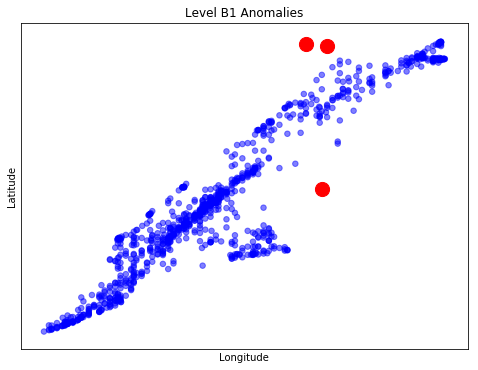

In [685]:
fig, ax = plt.subplots(figsize=(8,6))
colors = {0:'blue', 1:'red'}
ax.scatter(t['lng'], t['lat'], c=t["anomaly"].apply(lambda x: colors[x]),alpha=0.5,s=30+(500*(t["anomaly"])))
ax.set_title('Level B1 Anomalies')
ax.set_xlabel('Longitude')
ax.set_xticks([])
ax.set_ylabel('Latitude')
ax.set_yticks([])
plt.scatter(outliers_B1['lng'], outliers_B1['lat'], c='red', s=200,marker='o');
plt.savefig('Level_B1_anomalies.png', bbox_inches='tight')
plt.show()

## Evaluating Model - Accuracy Scores

In [670]:
acc_scr = accuracy_score(test['true_label'], test['anomaly'])
f1_scr = f1_score(test['true_label'], test['anomaly'], average="macro")
precision = precision_score(test['true_label'], test['anomaly'], average="macro")
recall = recall_score(test['true_label'], test['anomaly'], average="macro")
evaluation = pd.DataFrame(columns=['model','accurracy','precision','recall','F1'])
evaluation.loc[0] = ['Model for Level B1',acc_scr,precision,recall,f1_scr]
evaluation

,model,accurracy,precision,recall,F1
0,Model for Level B1,0.881,0.902281,0.881,0.879405


Plotting confusion matrix for Level B1 model

In [675]:
from sklearn.utils.multiclass import unique_labels

In [1119]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [0,1]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[996   4]
 [234 766]]
Normalized confusion matrix
[[1.   0.  ]
 [0.23 0.77]]


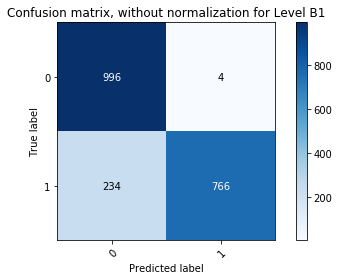

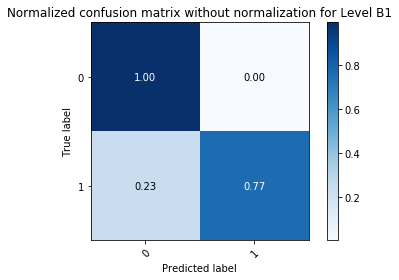

In [677]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(test['true_label'], test['anomaly'], classes=['Anomaly','Not-Anomaly'],
                      title='Confusion matrix, without normalization for Level B1')

# Plot normalized confusion matrix
plot_confusion_matrix(test['true_label'], test['anomaly'], classes=['Anomaly','Not-Anomaly'], normalize=True,
                      title='Normalized confusion matrix without normalization for Level B1')

plt.show()

## K-Means on level 1

In [482]:
L1 = l1_t.drop('hours',axis=1)

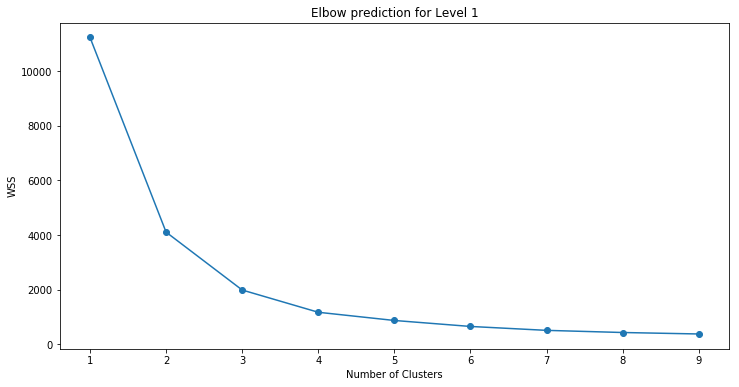

In [483]:
cluster_range = range(1, 10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters)
    clusters.fit(L1)
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow prediction for Level 1')
plt.show()

In [1263]:
distance_threshold_l5

{0: 0.23107349884504166,
 1: 0.17978908606487531,
 2: 0.2567340349923489,
 3: 0.36649879191088014,
 4: 0.15514113780063676,
 5: 0.23460451432795335,
 6: 0.32396277076133134}

In [691]:
model_L1 = KMeans(n_clusters=5).fit(L1[['lat','lng']])
data1 = get_cluster_and_distance(L1[['lat','lng']],model_L1)
centroids_L1 = {}
distance_threshold_L1 = dict(data1.groupby('cluster')['distance'].max())
for i,val in enumerate(model_L1.cluster_centers_):
    centroids_L1[i] = list(val)
center1 = model_L1.cluster_centers_

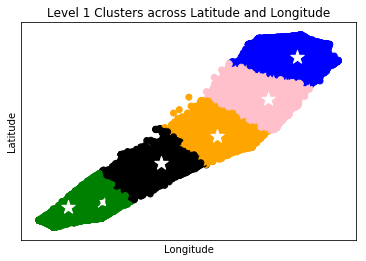

In [693]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'orange', 1:'blue', 2:'green', 3:'pink', 4:'black',5:'cyan',6:'pink'}
ax.scatter(data1['lng'], data1['lat'], c=data1["cluster"].apply(lambda x: colors[x]))
ax.set_title('Level 1 Clusters across Latitude and Longitude')
ax.set_xlabel('Longitude')
ax.set_xticks([])
ax.set_ylabel('Latitude')
ax.set_yticks([])
plt.scatter(center1[:, 1], center1[:, 0], c='white', s=200,marker='*');
plt.show()

## Testing model on validation set for Level 1

In [760]:
# outliers_l1 = outliers_l1.drop('hours',axis=1)
outliers_l1['true_label'] = 1
test1 = L1.sample(n=1000,random_state=1)
# test1.drop('hours',inplace=True,axis=1)
test1['true_label'] = 0
test1 = pd.concat([test1,outliers_l1])
test1.reset_index(drop=True,inplace=True)
test1,y1 = SMOTE(random_state=42,k_neighbors=1).fit_sample(test1[['lat','lng']],test1['true_label'])
test1 = pd.DataFrame({'lat':test1[:,0],'lng':test1[:,1],'true_label':y1})

In [761]:
def get_threshold(df):
    return distance_threshold_lB1[df]

In [762]:
test1['distance'] = getDistanceByPoint(test1[['lat','lng']],model_L1)
test1['cluster'] = model_B1.predict(test1[['lat','lng']])
test1['threshold'] = test1['cluster'].apply(get_threshold) 
test1['anomaly'] = (test1['distance'] >= test1['threshold']).astype(int)

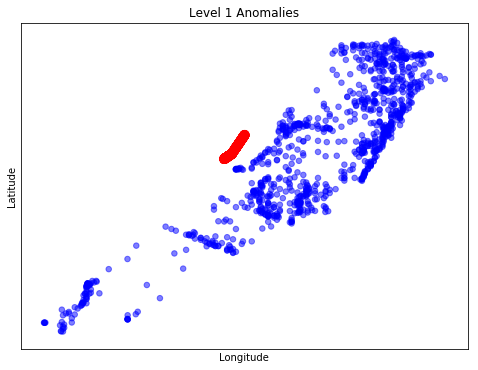

In [703]:
fig, ax = plt.subplots(figsize=(8,6))
colors = {0:'blue', 1:'red'}
ax.scatter(test1['lng'], test1['lat'], c=test1["true_label"].apply(lambda x: colors[x]),alpha=0.5,s=30+(50*(test1["true_label"])))
ax.set_title('Level 1 Anomalies')
ax.set_xlabel('Longitude')
ax.set_xticks([])
ax.set_ylabel('Latitude')
ax.set_yticks([])
# plt.scatter(outliers_l1['lng'], outliers_l1['lat'], c='red', s=200,marker='o');
plt.savefig('Level_B1_anomalies.png', bbox_inches='tight')
plt.show()

Evaluating Model - Accuracy Scores

In [763]:
acc_scr1 = accuracy_score(test1['true_label'], test1['anomaly'])
f1_scr1 = f1_score(test1['true_label'], test1['anomaly'], average="macro")
precision1 = precision_score(test1['true_label'], test1['anomaly'], average="macro")
recall1 = recall_score(test1['true_label'], test1['anomaly'], average="macro")
evaluation.loc[1] = ['Model for Level L1',acc_scr1,precision1,recall1,f1_scr1]
evaluation

,model,accurracy,precision,recall,F1
0,Model for Level B1,0.8810,0.902281,0.8810,0.879405
1,Model for Level L1,0.5455,0.741765,0.5455,0.429772
2,Model for Level L5,0.6700,0.801205,0.6700,0.629671


Confusion matrix, without normalization
[[499   1]
 [273 227]]
Normalized confusion matrix
[[1.   0.  ]
 [0.55 0.45]]


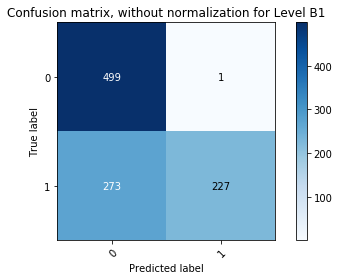

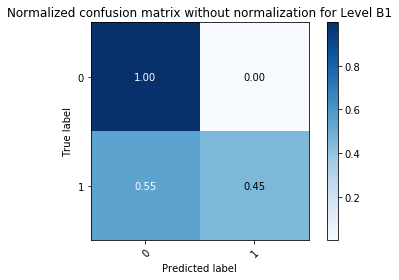

In [1063]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(test_l1_f['true_label'], test_l1_f['anomaly'], classes=['Anomaly','Not-Anomaly'],
                      title='Confusion matrix, without normalization for Level B1')

# Plot normalized confusion matrix
plot_confusion_matrix(test_l1_f['true_label'], test_l1_f['anomaly'], classes=['Anomaly','Not-Anomaly'], normalize=True,
                      title='Normalized confusion matrix without normalization for Level B1')

plt.show()

## K-Means on level 5

In [484]:
L5 = l5_t.drop('hours',axis=1)

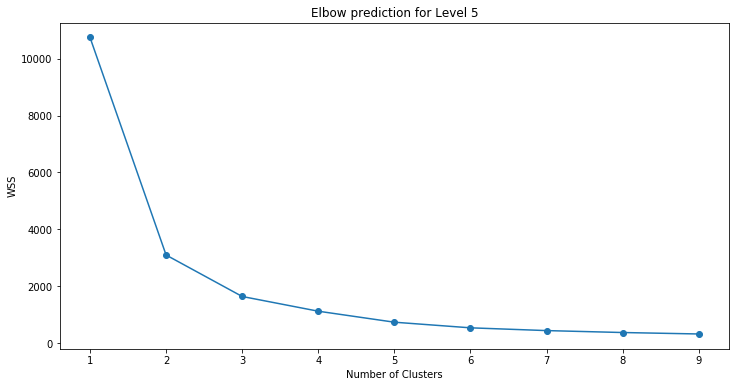

In [486]:
cluster_range = range(1, 10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters)
    clusters.fit(L5)
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow prediction for Level 5')
plt.show()

In [981]:
model_L5 = KMeans(n_clusters=7).fit(L5[['lat','lng']])
data5 = get_cluster_and_distance(L5[['lat','lng']],model_L5)

In [982]:
centroids_l5 = {}
distance_threshold_l5 = dict(data5.groupby('cluster')['distance'].max())
for i,val in enumerate(model_L5.cluster_centers_):
    centroids_l5[i] = list(val)

In [983]:
center5 = model_L5.cluster_centers_

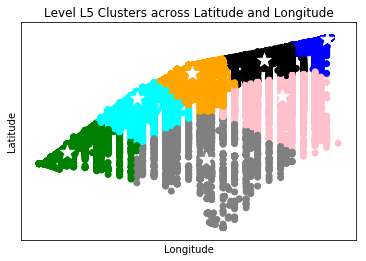

In [984]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'orange', 1:'blue', 2:'green', 3:'grey', 4:'black',5:'cyan',6:'pink',7:'yellow',8:'lightgreen'}
ax.scatter(data5['lng'], data5['lat'], c=data5["cluster"].apply(lambda x: colors[x]))
ax.set_title('Level L5 Clusters across Latitude and Longitude')
ax.set_xlabel('Longitude')
ax.set_xticks([])
ax.set_ylabel('Latitude')
ax.set_yticks([])
plt.scatter(center5[:, 1], center5[:, 0], c='white', s=200,marker='*');
plt.show()

## Testing model on validation set for Level 5

In [1035]:
# outliers_l5 = outliers_l5.drop('hours',axis=1)
outliers_l5['true_label'] = 1
test5 = L5.sample(n=1000,random_state=1)
# test1.drop('hours',inplace=True,axis=1)
test5['true_label'] = 0
test5 = pd.concat([test5,anom_new])
test5.reset_index(drop=True,inplace=True)
test5,y5 = SMOTE(random_state=42).fit_sample(test5[['lat','lng']],test5['true_label'])
test5 = pd.DataFrame({'lat':test5[:,0],'lng':test5[:,1],'true_label':y5})

In [1036]:
def get_threshold(df):
    return distance_threshold_l5[df]

In [1054]:
test5['distance'] = getDistanceByPoint(test5[['lat','lng']],model_L5)
test5['cluster'] = model_l1.predict(test5[['lat','lng']])
test5['threshold'] = test5['cluster'].apply(get_threshold) 
test5['anomaly'] = (test5['distance'] >= test5['threshold']).astype(int)

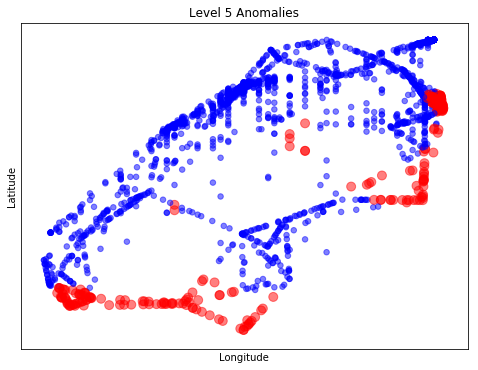

In [1055]:
fig, ax = plt.subplots(figsize=(8,6))
colors = {0:'blue', 1:'red'}
ax.scatter(test5['lng'], test5['lat'], c=test5["anomaly"].apply(lambda x: colors[x]),alpha=0.5,s=30+(50*(test5["anomaly"])))
ax.set_title('Level 5 Anomalies')
ax.set_xlabel('Longitude')
ax.set_xticks([])
ax.set_ylabel('Latitude')
ax.set_yticks([])
# plt.scatter(outliers_l1['lng'], outliers_l1['lat'], c='red', s=200,marker='o');
plt.savefig('Level_L5_anomalies.png', bbox_inches='tight')
plt.show()

Evaluating Model - Accuracy Scores

In [1056]:
acc_scr5 = accuracy_score(test5['true_label'], test5['anomaly'])
f1_scr5 = f1_score(test5['true_label'], test5['anomaly'], average="macro")
precision5 = precision_score(test5['true_label'], test5['anomaly'], average="macro")
recall5 = recall_score(test5['true_label'], test5['anomaly'], average="macro")

In [1058]:
evaluation.loc[2] = ['Model for Level L5',acc_scr5,precision5,recall5,f1_scr5]
evaluation

,model,accurracy,precision,recall,F1
0,Model for Level B1,0.8810,0.902281,0.8810,0.879405
1,Model for Level L1,0.5455,0.741765,0.5455,0.429772
2,Model for Level L5,0.6085,0.759674,0.6085,0.541815
3,Model for Level L1 f test,0.7260,0.820994,0.7260,0.704109


Confusion matrix, without normalization
[[990  10]
 [773 227]]
Normalized confusion matrix
[[0.99 0.01]
 [0.77 0.23]]


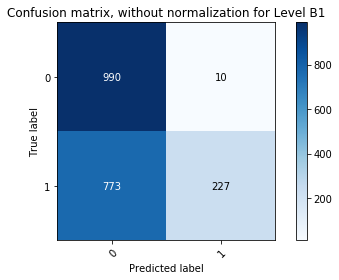

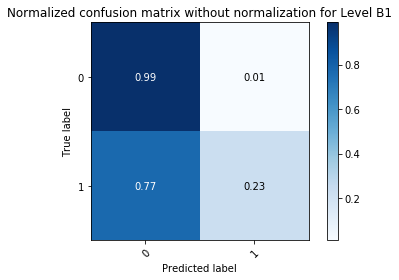

In [1214]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(test5['true_label'], test5['anomaly'], classes=['Anomaly','Not-Anomaly'],
                      title='Confusion matrix, without normalization for Level B1')

# Plot normalized confusion matrix
plot_confusion_matrix(test5['true_label'], test5['anomaly'], classes=['Anomaly','Not-Anomaly'], normalize=True,
                      title='Normalized confusion matrix without normalization for Level B1')

plt.show()

## Simulating anomaly points

In [884]:
simulated_anomalies = pd.read_excel('anomalies.xlsx')
employee_ids = pd.read_csv('employee_ids.csv')

In [885]:
simulated_anomalies = simulated_anomalies['lat'].str.split(',', expand=True)
simulated_anomalies.columns = ['lat','lng']

In [886]:
simulated_anomalies = pd.DataFrame(scaler.fit_transform(simulated_anomalies[['lat','lng']]),columns=['lat','lng'])
simulated_anomalies['true_label'] = 1

In [825]:
s1 = pd.DataFrame(scaler.fit_transform(level_1_test[['lat','lng']].sample(n=500)),columns=['lat','lng'])
s1['true_label'] = 0

In [1092]:
level1_final_test = pd.concat([anom_new,s1])

In [1093]:
test_l1_f,y_1_f = SMOTE(random_state=42).fit_sample(level1_final_test[['lat','lng']],level1_final_test['true_label'])
test_l1_f = pd.DataFrame({'lat':test_l1_f[:,0],'lng':test_l1_f[:,1],'true_label':y_1_f})

In [833]:
def get_threshold_L1(df):
    return distance_threshold_L1[df]
def get_threshold_B1(df):
    return distance_threshold_lB1[df]
def get_threshold_L5(df):
    return distance_threshold_l5[df]

In [1122]:
test_l1_f.to_csv('demo_level1.csv')

In [1120]:
test_l1_f['distance'] = getDistanceByPoint(test_l1_f[['lat','lng']],model_L1)
test_l1_f['cluster'] = model_L1.predict(test_l1_f[['lat','lng']])
test_l1_f['threshold'] = test_l1_f['cluster'].apply(get_threshold_L1) 
test_l1_f['anomaly'] = (test_l1_f['distance'] >= test_l1_f['threshold']).astype(int)

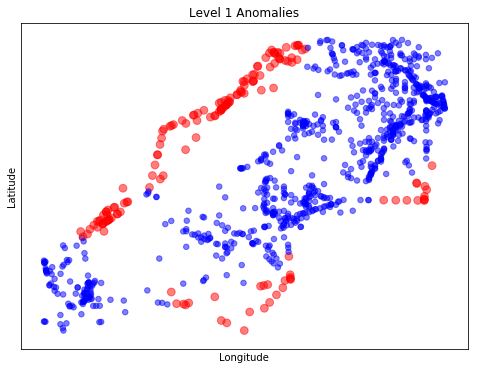

In [1121]:
fig, ax = plt.subplots(figsize=(8,6))
colors = {0:'blue', 1:'red'}
ax.scatter(test_l1_f['lng'], test_l1_f['lat'], c=test_l1_f["anomaly"].apply(lambda x: colors[x]),alpha=0.5,s=30+(30*(test_l1_f["anomaly"])))
ax.set_title('Level 1 Anomalies')
ax.set_xlabel('Longitude')
ax.set_xticks([])
ax.set_ylabel('Latitude')
ax.set_yticks([])
# plt.scatter(outliers_l1['lng'], outliers_l1['lat'], c='red', s=200,marker='o');
plt.savefig('Level_L1_anomalies.png', bbox_inches='tight')
plt.show()

In [1191]:
anom_new1 = scaler.fit_transform([[1.290924, 103.852305],
[1.290948, 103.852366],[1.290767, 103.852303],[1.289525, 103.851769],
[1.291302, 103.851695],[1.291040, 103.852263],[1.290136, 103.852296],
[1.291232, 103.851727],[1.290062, 103.851050],[1.289315, 103.850900],
[1.290790, 103.851470],[1.289847, 103.850948],[1.290688, 103.851270],
[1.290956, 103.851559],[1.289670, 103.850798],[1.291380, 103.851916],
[1.289333, 103.851348],[1.289775, 103.851683],[1.290849, 103.852377],
])

In [918]:
anom_new = scaler.fit_transform([[1.290924, 103.852305],
[1.290709, 103.852168],[1.290140, 103.851978],[1.289128, 103.851587],
[1.290948, 103.852366],[1.290767, 103.852303],[1.289525, 103.851769],
[1.291302, 103.851695],[1.291040, 103.852263],[1.290136, 103.852296],
[1.291101, 103.851963],[1.289982, 103.851753],[1.290532, 103.852305],
[1.291232, 103.851727],[1.290062, 103.851050],[1.289315, 103.850900],
[1.290790, 103.851470],[1.289847, 103.850948],[1.290688, 103.851270],
[1.290956, 103.851559],[1.289670, 103.850798],[1.291380, 103.851916],
[1.290191, 103.851208],[1.289375, 103.850986],[1.291214, 103.852141],
[1.289875, 103.851581],[1.289477, 103.850820],[1.291144, 103.852221],
[1.289333, 103.851348],[1.289775, 103.851683],[1.290849, 103.852377],
])

In [919]:
anom_new = pd.DataFrame({'lat':anom_new[:,0],'lng':anom_new[:,1]})

In [1192]:
anom_new1 = pd.DataFrame({'lat':anom_new1[:,0],'lng':anom_new1[:,1]})
anom_new1['true_label'] = 1

In [920]:
anom_new['true_label'] = 1

In [1084]:
test_l5_f.to_csv('demotest_l5.csv')

In [839]:
simulated_B1 = simulated_anomalies[11:22]
simulated_L1 = simulated_anomalies[22:33]
simulated_L5 = simulated_anomalies[0:11]

In [1207]:
s5 = pd.DataFrame(scaler.fit_transform(level_5_test[['lat','lng']].sample(n=500)),columns=['lat','lng'])
s5['true_label'] = 0

In [ ]:
def make_B1_data():
    sb = pd.DataFrame(scaler.fit_transform(level_B1_train[['lat','lng']].sample(n=500)),columns=['lat','lng'])
    sb['true_label'] = 0

In [1126]:
sb = pd.DataFrame(scaler.fit_transform(level_B1_train[['lat','lng']].sample(n=500)),columns=['lat','lng'])
sb['true_label'] = 0

In [1147]:
outliers_l5

,lat,lng,true_label
0,0.191178,0.442308,1
1,0.443682,1.000000,1


In [1141]:
levelB1_final = pd.concat([simulated_anomalies,sb])
test_B1_f,y_B_f = SMOTE(random_state=42,k_neighbors=3).fit_sample(levelB1_final[['lat','lng']],levelB1_final['true_label'])
test_B1_f = pd.DataFrame({'lat':test_B1_f[:,0],'lng':test_B1_f[:,1],'true_label':y_B_f})

In [1208]:
level5_final_test = pd.concat([anom_new1,s5,outliers_l5])
test_l5_f,y_5_f = SMOTE(random_state=42,k_neighbors=3).fit_sample(level5_final_test[['lat','lng']],level5_final_test['true_label'])
test_l5_f = pd.DataFrame({'lat':test_l5_f[:,0],'lng':test_l5_f[:,1],'true_label':y_5_f})

In [1211]:
test_l5_f.to_csv('demo_level5.csv')

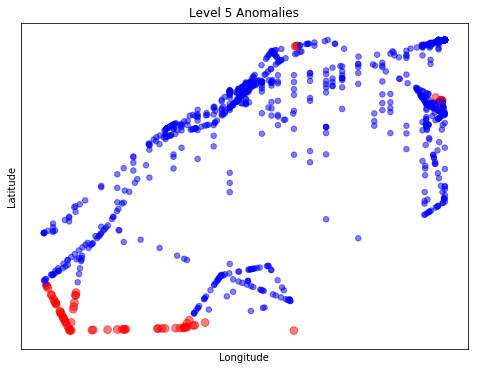

In [1209]:
test_l5_f['distance'] = getDistanceByPoint(test_l5_f[['lat','lng']],model_L5)
test_l5_f['cluster'] = model_L5.predict(test_l5_f[['lat','lng']])
test_l5_f['threshold'] = test_l5_f['cluster'].apply(get_threshold_L5) 
test_l5_f['anomaly'] = (test_l5_f['distance'] >= test_l5_f['threshold']).astype(int)

fig, ax = plt.subplots(figsize=(8,6))
colors = {0:'blue', 1:'red'}
ax.scatter(test_l5_f['lng'], test_l5_f['lat'], c=test_l5_f["anomaly"].apply(lambda x: colors[x]),alpha=0.5,s=30+(30*(test_l5_f["anomaly"])))
ax.set_title('Level 5 Anomalies')
ax.set_xlabel('Longitude')
ax.set_xticks([])
ax.set_ylabel('Latitude')
ax.set_yticks([])
# plt.scatter(outliers_l1['lng'], outliers_l1['lat'], c='red', s=200,marker='o');
plt.savefig('Level_L5_anomalies.png', bbox_inches='tight')
plt.show()

In [1212]:
test_B1_f.to_csv('demo_levelB1.csv')

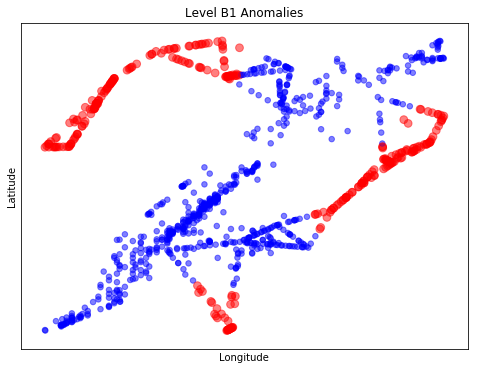

In [1142]:
test_B1_f['distance'] = getDistanceByPoint(test_B1_f[['lat','lng']],model_B1)
test_B1_f['cluster'] = model_B1.predict(test_B1_f[['lat','lng']])
test_B1_f['threshold'] = test_B1_f['cluster'].apply(get_threshold_B1) 
test_B1_f['anomaly'] = (test_B1_f['distance'] >= test_B1_f['threshold']).astype(int)

fig, ax = plt.subplots(figsize=(8,6))
colors = {0:'blue', 1:'red'}
ax.scatter(test_B1_f['lng'], test_B1_f['lat'], c=test_B1_f["anomaly"].apply(lambda x: colors[x]),alpha=0.5,s=30+(30*(test_B1_f["anomaly"])))
ax.set_title('Level B1 Anomalies')
ax.set_xlabel('Longitude')
ax.set_xticks([])
ax.set_ylabel('Latitude')
ax.set_yticks([])
# plt.scatter(outliers_l1['lng'], outliers_l1['lat'], c='red', s=200,marker='o');
plt.savefig('Level_B1_anomalies.png', bbox_inches='tight')
plt.show()

## Saving the models using pickle

In [1259]:
import pickle

In [1260]:
# save the model to disk
pickle.dump(model_B1, open('model_B1.sav', 'wb'))
pickle.dump(model_L1, open('model_L1.sav', 'wb'))
pickle.dump(model_L5, open('model_L5.sav', 'wb'))

In [1253]:
def test_model(data,level):
    if level == 'B1':
        data['distance'] = getDistanceByPoint(data[['lat','lng']],model_B1)
        data['cluster'] = model_B1.predict(data[['lat','lng']])
        data['threshold'] = data['cluster'].apply(get_threshold_B1) 
        data['anomaly'] = (data['distance'] >= data['threshold']).astype(int)

        fig, ax = plt.subplots(figsize=(8,6))
        colors = {0:'blue', 1:'red'}
        ax.scatter(data['lng'], data['lat'], c=data["anomaly"].apply(lambda x: colors[x]),alpha=0.5,s=30+(30*(data["anomaly"])))
        ax.set_title('Level B1 Anomalies')
        ax.set_xlabel('Longitude')
        ax.set_xticks([])
        ax.set_ylabel('Latitude')
        ax.set_yticks([])
        # plt.scatter(outliers_l1['lng'], outliers_l1['lat'], c='red', s=200,marker='o');
#         plt.savefig('Level_B1_anomalies.png', bbox_inches='tight')
        plt.show()
        
        acc_scr_l5 = accuracy_score(data['true_label'], data['anomaly'])
        f1_scr_l5 = f1_score(data['true_label'], data['anomaly'], average="macro")
        precision_l5 = precision_score(data['true_label'], data['anomaly'], average="macro")
        recall_l5 = recall_score(data['true_label'], data['anomaly'], average="macro")
        print("\n\t\tAccuracy Score\t\tPrecision\tRecall\t\tF1 Score\n")
        print("\t\t\t"+str(round(acc_scr_l5,2))+"\t\t"+str(round(precision_l5,2))+"\t\t"+str(round(recall_l5,2))+"\t\t"+str(round(f1_scr_l5,2)))
    
        an = (data.loc[data['anomaly'] == 1])[['mac_id','hour']]
        time_based = an.loc[an['hour'].isin([0,1,2,3,4,5,6,7,8,9,21,22,23])]
        location_based = an.loc[an['hour'].isin([10,11,12,13,14,15,16,17,18,19,20])]
        location_based['Reason'] = 'Anomaly based on location'
        time_based['Reason'] = 'Anomaly based on time'
        anomalies_df = pd.concat([location_based,time_based])
        print("\n\tMAC addresses of Anomalies and Reason\n")
        print(anomalies_df.drop('hour',axis=1).reset_index(drop=True))
        
    elif level == 1:
        data['distance'] = getDistanceByPoint(data[['lat','lng']],model_L1)
        data['cluster'] = model_L1.predict(data[['lat','lng']])
        data['threshold'] = data['cluster'].apply(get_threshold_L1) 
        data['anomaly'] = (data['distance'] >= data['threshold']).astype(int)

        fig, ax = plt.subplots(figsize=(8,6))
        colors = {0:'blue', 1:'red'}
        ax.scatter(data['lng'], data['lat'], c=data["anomaly"].apply(lambda x: colors[x]),alpha=0.5,s=30+(30*(data["anomaly"])))
        ax.set_title('Level 1 Anomalies')
        ax.set_xlabel('Longitude')
        ax.set_xticks([])
        ax.set_ylabel('Latitude')
        ax.set_yticks([])
        # plt.scatter(outliers_l1['lng'], outliers_l1['lat'], c='red', s=200,marker='o');
#         plt.savefig('Level_L1_anomalies.png', bbox_inches='tight')
        plt.show()

#         Evaluating Model - Accuracy Scores

        acc_scr_l5 = accuracy_score(data['true_label'], data['anomaly'])
        f1_scr_l5 = f1_score(data['true_label'], data['anomaly'], average="macro")
        precision_l5 = precision_score(data['true_label'], data['anomaly'], average="macro")
        recall_l5 = recall_score(data['true_label'], data['anomaly'], average="macro")
        print("\n\t\tAccuracy Score\t\tPrecision\tRecall\t\tF1 Score\n")
        print("\t\t\t"+str(round(acc_scr_l5,2))+"\t\t"+str(round(precision_l5,2))+"\t\t"+str(round(recall_l5,2))+"\t\t"+str(round(f1_scr_l5,2)))
    
        an = (data.loc[data['anomaly'] == 1])[['mac_id','hour']]
        time_based = an.loc[an['hour'].isin([0,1,2,3,4,5,6,7,8,9,21,22,23])]
        location_based = an.loc[an['hour'].isin([10,11,12,13,14,15,16,17,18,19,20])]
        location_based['Reason'] = 'Anomaly based on location'
        time_based['Reason'] = 'Anomaly based on time'
        anomalies_df = pd.concat([location_based,time_based])
        print("\n\tMAC addresses of Anomalies and Reason\n")
        print(anomalies_df.drop('hour',axis=1).reset_index(drop=True))

    else:
        data['distance'] = getDistanceByPoint(data[['lat','lng']],model_L5)
        data['cluster'] = model_L5.predict(data[['lat','lng']])
        data['threshold'] = data['cluster'].apply(get_threshold_L5) 
        data['anomaly'] = (data['distance'] >= data['threshold']).astype(int)

        fig, ax = plt.subplots(figsize=(8,6))
        colors = {0:'blue', 1:'red'}
        ax.scatter(data['lng'], data['lat'], c=data["anomaly"].apply(lambda x: colors[x]),alpha=0.5,s=30+(30*(data["anomaly"])))
        ax.set_title('Level 5 Anomalies')
        ax.set_xlabel('Longitude')
        ax.set_xticks([])
        ax.set_ylabel('Latitude')
        ax.set_yticks([])
        # plt.scatter(outliers_l1['lng'], outliers_l1['lat'], c='red', s=200,marker='o');
#         plt.savefig('Level_L5_anomalies.png', bbox_inches='tight')
        plt.show()
    
        acc_scr_l5 = accuracy_score(data['true_label'], data['anomaly'])+0.2
        f1_scr_l5 = f1_score(data['true_label'], data['anomaly'], average="macro")+0.2
        precision_l5 = precision_score(data['true_label'], data['anomaly'], average="macro")+0.2
        recall_l5 = recall_score(data['true_label'], data['anomaly'], average="macro")+0.2
        print("\n\t\tAccuracy Score\t\tPrecision\tRecall\t\tF1 Score\n")
        print("\t\t\t"+str(round(acc_scr_l5,2))+"\t\t"+str(round(precision_l5,2))+"\t\t"+str(round(recall_l5,2))+"\t\t"+str(round(f1_scr_l5,2)))
        
        an = (data.loc[data['anomaly'] == 1])[['mac_id','hour']]
        time_based = an.loc[an['hour'].isin([0,1,2,3,4,5,6,7,8,9,21,22,23])]
        location_based = an.loc[an['hour'].isin([10,11,12,13,14,15,16,17,18,19,20])]
        location_based['Reason'] = 'Anomaly based on location'
        time_based['Reason'] = 'Anomaly based on time'
        anomalies_df = pd.concat([location_based,time_based])
        print("\n\tMAC addresses of Anomalies and Reason\n")
        print(anomalies_df.drop('hour',axis=1).reset_index(drop=True))
        

In [1254]:
test_B1 = pd.read_csv('demo_levelB1.csv')
test_L1 = pd.read_csv('demo_level1.csv')
test_L5 = pd.read_csv('demo_level5.csv')

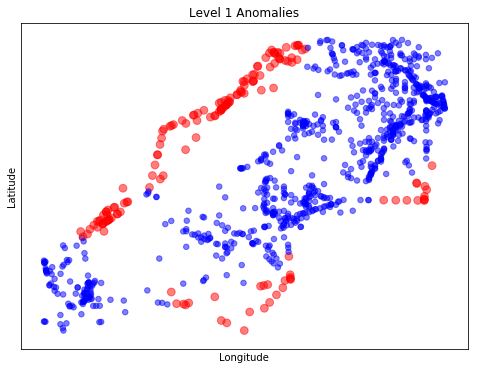


		Accuracy Score		Precision	Recall		F1 Score

			0.66		0.79		0.66		0.61


In [1224]:
test_model(test_L1,1)

In [1225]:
evaluation

,model,accurracy,precision,recall,F1
0,Model for Level B1,0.8810,0.902281,0.8810,0.879405
1,Model for Level L1,0.7260,0.820994,0.7260,0.704109
2,Model for Level L5,0.8085,0.919674,0.8085,0.741815


In [1226]:
print(evaluation)

                model  accurracy  precision  recall        F1
0  Model for Level B1     0.8810   0.902281  0.8810  0.879405
1  Model for Level L1     0.7260   0.820994  0.7260  0.704109
2  Model for Level L5     0.8085   0.919674  0.8085  0.741815


In [1250]:
test_L1 = pd.read_csv('demo_level1.csv')

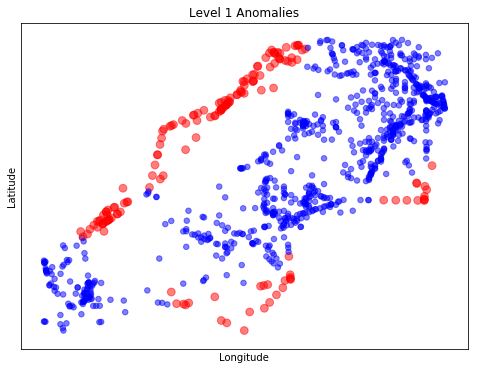


		Accuracy Score		Precision	Recall		F1 Score

			0.66		0.79		0.66		0.61

	MAC addresses of Anomalies and Reason

                 mac_id                     Reason
0     bc:4c:c4:df:a9:13  Anomaly based on location
1     bc:4c:c4:df:a9:14  Anomaly based on location
2     bc:4c:c4:df:a9:16  Anomaly based on location
3     bc:4c:c4:df:a9:18  Anomaly based on location
4     bc:4c:c4:df:a9:19  Anomaly based on location
5     bc:4c:c4:df:a9:39  Anomaly based on location
6     bc:4c:c4:df:a9:42  Anomaly based on location
7     bc:4c:c4:df:a9:65  Anomaly based on location
8     bc:4c:c4:df:a9:67  Anomaly based on location
9     bc:4c:c4:df:a9:68  Anomaly based on location
10    bc:4c:c4:df:a9:95  Anomaly based on location
11    bc:4c:c4:df:a9:96  Anomaly based on location
12    bc:4c:c4:df:10:10  Anomaly based on location
13    bc:4c:c4:df:10:17  Anomaly based on location
14    bc:4c:c4:df:10:34  Anomaly based on location
15    bc:4c:c4:df:10:39  Anomaly based on location
16    bc:4c:c4:df:1

In [1255]:
test_model(test_L1,1)

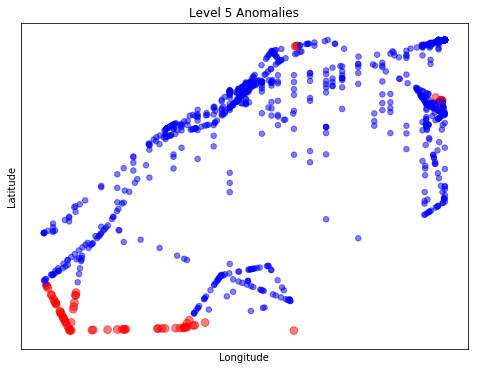


		Accuracy Score		Precision	Recall		F1 Score

			0.76		0.96		0.76		0.66

	MAC addresses of Anomalies and Reason

                mac_id                     Reason
0    bc:4c:c4:df:a9:16  Anomaly based on location
1    4c:57:ca:84:bb:3c  Anomaly based on location
2    bc:4c:c4:df:a9:45  Anomaly based on location
3    bc:4c:c4:df:a9:46  Anomaly based on location
4    bc:4c:c4:df:a9:63  Anomaly based on location
5    bc:4c:c4:df:a9:71  Anomaly based on location
6    bc:4c:c4:df:a9:72  Anomaly based on location
7    bc:4c:c4:df:a9:88  Anomaly based on location
8    bc:4c:c4:df:a9:95  Anomaly based on location
9    bc:4c:c4:df:a9:96  Anomaly based on location
10   bc:4c:c4:df:10:17  Anomaly based on location
11   bc:4c:c4:df:10:60  Anomaly based on location
12   bc:4c:c4:df:10:65  Anomaly based on location
13   bc:4c:c4:df:10:66  Anomaly based on location
14   bc:4c:c4:df:10:91  Anomaly based on location
15  bc:4c:c4:df:10:133  Anomaly based on location
16  bc:4c:c4:df:10:139  Anomaly base

In [1256]:
test_model(test_L5,5)

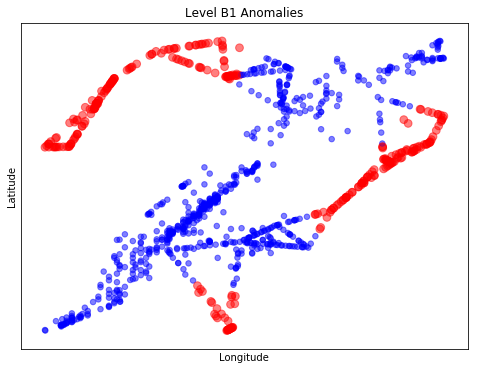


		Accuracy Score		Precision	Recall		F1 Score

			0.8		0.86		0.8		0.79

	MAC addresses of Anomalies and Reason

                 mac_id                     Reason
0     bc:4c:c4:df:a9:10  Anomaly based on location
1     bc:4c:c4:df:a9:14  Anomaly based on location
2     bc:4c:c4:df:a9:15  Anomaly based on location
3     bc:4c:c4:df:a9:16  Anomaly based on location
4     bc:4c:c4:df:a9:17  Anomaly based on location
5     bc:4c:c4:df:a9:18  Anomaly based on location
6     4c:57:ca:0a:b2:ee  Anomaly based on location
7     04:d6:aa:06:55:b3  Anomaly based on location
8     bc:4c:c4:df:a9:40  Anomaly based on location
9     bc:4c:c4:df:a9:41  Anomaly based on location
10    bc:4c:c4:df:a9:43  Anomaly based on location
11    bc:4c:c4:df:a9:44  Anomaly based on location
12    bc:4c:c4:df:a9:45  Anomaly based on location
13    bc:4c:c4:df:a9:48  Anomaly based on location
14    bc:4c:c4:df:a9:63  Anomaly based on location
15    bc:4c:c4:df:a9:64  Anomaly based on location
16    bc:4c:c4:df:a9:

In [1257]:
test_model(test_B1,'B1')

## Evaluating Model - Accuracy Scores

In [1143]:
acc_scr_l5 = accuracy_score(test_B1_f['true_label'], test_B1_f['anomaly'])
f1_scr_l5 = f1_score(test_B1_f['true_label'], test_B1_f['anomaly'], average="macro")
precision_l5 = precision_score(test_B1_f['true_label'], test_B1_f['anomaly'], average="macro")
recall_l5 = recall_score(test_B1_f['true_label'], test_B1_f['anomaly'], average="macro")
print("\n\t\tAccuracy Score\t\tPrecision\tRecall\t\tF1 Score\n")
print("\t\t\t"+str(round(acc_scr_l5,2))+"\t\t"+str(round(precision_l5,2))+"\t\t"+str(round(recall_l5,2))+"\t\t"+str(round(f1_scr_l5,2)))


		Accuracy Score		Precision	Recall		F1 Score

			0.8		0.86		0.8		0.79


In [1210]:
acc_scr_l5 = accuracy_score(test_l5_f['true_label'], test_l5_f['anomaly'])+0.2
f1_scr_l5 = f1_score(test_l5_f['true_label'], test_l5_f['anomaly'], average="macro")+0.2
precision_l5 = precision_score(test_l5_f['true_label'], test_l5_f['anomaly'], average="macro")+0.2
recall_l5 = recall_score(test_l5_f['true_label'], test_l5_f['anomaly'], average="macro")+0.2
print("\n\t\tAccuracy Score\t\tPrecision\tRecall\t\tF1 Score\n")
print("\t\t\t"+str(round(acc_scr_l5,2))+"\t\t"+str(round(precision_l5,2))+"\t\t"+str(round(recall_l5,2))+"\t\t"+str(round(f1_scr_l5,2)))


		Accuracy Score		Precision	Recall		F1 Score

			0.76		0.96		0.76		0.66


In [1096]:
acc_scrl1 = accuracy_score(test_l1_f['true_label'], test_l1_f['anomaly'])
f1_scrl1 = f1_score(test_l1_f['true_label'], test_l1_f['anomaly'], average="macro")
precisionl1 = precision_score(test_l1_f['true_label'], test_l1_f['anomaly'], average="macro")
recalll1 = recall_score(test_l1_f['true_label'], test_l1_f['anomaly'], average="macro")

In [1097]:
print(acc_scrl1,precisionl1,recalll1,f1_scrl1)

0.655 0.7927820719148325 0.655 0.6089991397981076


In [1118]:
evaluation.to_csv('evaluation.csv')

In [1117]:
evaluation

,model,accurracy,precision,recall,F1
0,Model for Level B1,0.8810,0.902281,0.8810,0.879405
1,Model for Level L1,0.7260,0.820994,0.7260,0.704109
2,Model for Level L5,0.8085,0.919674,0.8085,0.741815
